In [1]:
%matplotlib inline
%config InLineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [6]:
# Importing the training set

dataset_train = pd.read_csv('C:\\Users\\shubh\\Machine Learning Course\\RNN-Stock-Price-master\\RNN-Stock-Price-master\\Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
training_set[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

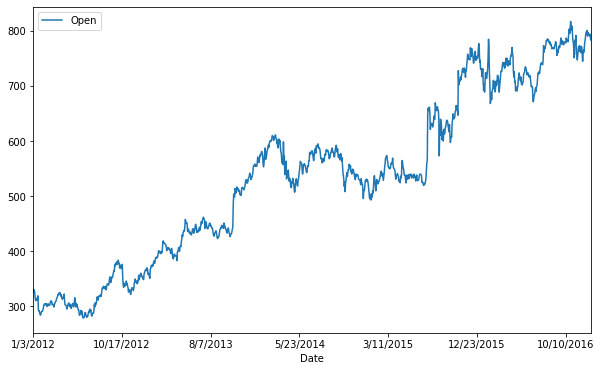

In [9]:
dataset_train[:].plot(x='Date', y='Open')
plt.show()

In [10]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [11]:
len(training_set_scaled)

1258

In [12]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train , y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1198, 60)

In [13]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [14]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

In [16]:
# Compiling the RNN

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [18]:
# Fitting the RNN to the Training set

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0415
Epoch 2/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [==============================] - 8s 6ms/step - l

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0014


In [19]:
model.save('model.h5')

In [20]:
from keras.models import load_model
model = load_model('model.h5')

In [21]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('C:\\Users\\shubh\\Machine Learning Course\\RNN-Stock-Price-master\\RNN-Stock-Price-master\\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs.shape

(80,)

In [23]:
inputs = inputs.reshape(-1, 1)
inputs.shape

(80, 1)

In [24]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

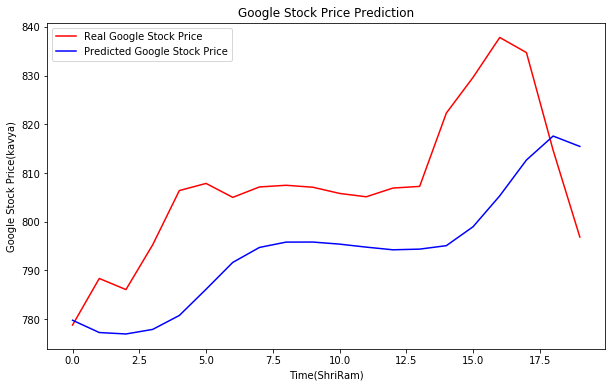

In [26]:
# Visualising the results
plt.plot(real_stock_price, color ='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time(ShriRam)')
plt.ylabel('Google Stock Price(kavya)')
plt.legend()
plt.show()